# Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import math
from osgeo import gdal,gdal_array
from sklearn.cluster import KMeans

DATA_PATH = 'Dataset_963A/'

In [2]:
def save_img2Geotiff(img,filename):
    r,c = img.shape
    pr_d = gdal.Open(DATA_PATH+'LandMasked_Amplitude_VV.tif')
    driver = gdal.GetDriverByName("GTiff")
    outdata = driver.Create(filename, r, c, 1, gdal.GDT_Float32)
    outdata.SetGeoTransform(pr_d.GetGeoTransform())##sets same geotransform as input
    outdata.SetProjection(pr_d.GetProjection())##sets same projection as input
    outdata.GetRasterBand(1).WriteArray(img)
    print("Image Saved Succesfully.")
    
def readGeoTiff(img):
    # Importing Product and getting data from the band
    product = gdal_array.LoadFile(img)
    product = np.array(product)
    return product

def subsetImg(img,row,col):
    #Comuting subset of the image for demo processing
    subset_min_size = row
    subset_max_size = col
    size = subset_max_size - subset_min_size
    subset_data = img[subset_min_size:subset_max_size,subset_min_size:subset_max_size]
    subset_data = np.array(subset_data)
    #plt.imsave('Input_Image.tiff',subset_data,cmap='gray')
    #print(subset_data.shape)
    
    return subset_data
   

def visualizeImg(img):
    plt.imshow(img,cmap='gray',vmin=0,vmax=255)



# Getting sliding window
#img is the image and m is the size of window (eg 3x3, 5x5)
def sliding_window(img,m):
    
    if m == 3:
         #make the loop for 3 and 5.
        s = img.shape[0]
        for i in range(1):
            z = np.zeros([s,1])
            img = np.concatenate((z,img),axis=1)
            
            z = np.zeros([s,1])
            img = np.concatenate((img,z),axis=1)
            
            s = s+2
            
            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)
            
            z = np.zeros([1,s])
            img = np.concatenate((z,img),axis=0)
        
    elif m==5:
        
        s = img.shape[0]
        for i in range(1):
            z = np.zeros([s,1])
            img = np.concatenate((z,img),axis=1)

            z = np.zeros([s,1])
            img = np.concatenate((img,z),axis=1)
            
            s = s+2

            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)

            z = np.zeros([1,s])
            img = np.concatenate((z,img),axis=0)

            z = np.zeros([s,1])
            img = np.concatenate((z,img),axis=1)

            z = np.zeros([s,1])
            img = np.concatenate((img,z),axis=1)
            
            s = s+2

            z = np.zeros([1,s])
            img = np.concatenate((img,z),axis=0)

            z = np.zeros([1,s])
            img = np.concatenate((z,img),axis=0)
            
    
    window= []
    stepSize = 1
    w_width = m
    w_height = w_width
    for x in range(0,  img.shape[1] - w_width +1, stepSize):
        for y in range(0, img.shape[0] - w_height +1, stepSize):
            window.append(img[x:x + w_width, y:y + w_height])
    
    window = np.array(window)
    return window


#getting center_pixel for every sliding window
def get_center_pixel(window):
    x_i = int(len(window)/2)
    return window[x_i][x_i]

#getting mean of sliding window
def getMean(window):
    return window.mean()

#getting stdev of sliding window
def getStdev(window):
    return window.std()  

#computing threshold for the sliding window
def compThreshold(window):
    center_pixel = get_center_pixel(window)
    win_mean = getMean(window)
    win_stdev = getStdev(window)
    return ((center_pixel-win_mean)/win_stdev)

#plotting binary image for the specific threshold.
#here img_d always takes ndarray.
def shipDetection_binaryImg(img_d,threshold):
    for i in range(len(img_d)):
        if img_d[i] >= threshold:
            img_d[i] = 1      #Valid ship
        else:
            img_d[i] = 0      #not a ship
        
    img_size = int(math.sqrt(len(img_d)))
    img_d_img = img_d.reshape(img_size,img_size)
    return img_d_img

10201 10596


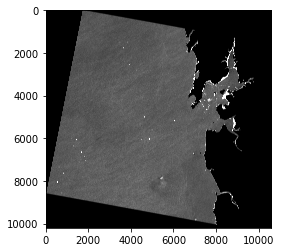

In [3]:
#Computing rows and columns
band_data_arr = readGeoTiff(DATA_PATH+'LandMasked_Amplitude_VV.tif')
rows,col = band_data_arr.shape
print(rows,col)
visualizeImg(band_data_arr)

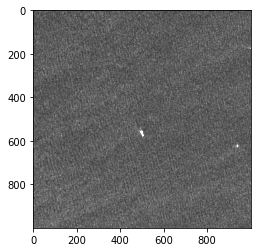

In [52]:
subset_img = subsetImg(band_data_arr,5000,6000)
visualizeImg(subset_img)
#save_img2Geotiff(subset_img,DATA_PATH+'CFARResults/Input.tif')

In [53]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
#kernel_size = 3
#win = sliding_window(subset_img,kernel_size)

In [54]:
#win_thresh = []
#for w in win:
#    win_thresh.append((compThreshold(w)))

#win_thresh = np.array((win_thresh))
#avg_thre = (min(win_thresh) + (max(win_thresh)))/2
#print(avg_thre,max(win_thresh),min(win_thresh))

In [56]:
#fin_img = shipDetection_binaryImg(win_thresh,avg_thre)

#save_img2Geotiff(fin_img,'Dataset_963A/CFARResults/Output.tif')
temp = subset_img.reshape(1000000,1)

In [57]:
t_set = []

for z in range(len(temp)):
    t_set.append([z,temp[z]])

In [83]:
#d = [[int(i) for i in range(len(temp))],[(data) for data in temp]]
kmeans = KMeans(n_clusters=100,random_state=0).fit(t_set)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [84]:
kmeans.labels_

array([54, 54, 54, ...,  4,  4,  4], dtype=int32)

In [85]:
kmeans.cluster_centers_

array([[3.03730000e+05, 9.21786495e+01],
       [8.20939000e+05, 9.88414437e+01],
       [9.38545000e+04, 9.24271379e+01],
       [5.68247500e+05, 9.64600853e+01],
       [9.94678000e+05, 9.67230678e+01],
       [6.97991500e+05, 9.31834780e+01],
       [4.27642500e+05, 9.42800148e+01],
       [2.16977500e+05, 9.32806095e+01],
       [9.43611000e+05, 9.68129451e+01],
       [1.71330000e+04, 9.03771156e+01],
       [3.67944000e+05, 9.36293598e+01],
       [4.94798500e+05, 9.15413311e+01],
       [1.49775000e+05, 9.31023911e+01],
       [6.13166000e+05, 9.27718756e+01],
       [8.79292500e+05, 9.90254815e+01],
       [7.62685000e+05, 9.57355427e+01],
       [4.50575000e+04, 9.20897105e+01],
       [2.46773000e+05, 9.45146414e+01],
       [6.54550000e+05, 9.39821465e+01],
       [9.08140500e+05, 9.62839330e+01],
       [7.20954000e+05, 9.37237184e+01],
       [5.23067000e+05, 9.35457712e+01],
       [3.31886500e+05, 9.11400304e+01],
       [4.71777000e+05, 9.12665147e+01],
       [1.765915

In [86]:
# plt.scatter(d[0],d[1])
# plt.xlabel("Pixel Idx")
# plt.ylabel("Pixel Val")
# plt.title("Image Analysis")

In [87]:
test_img = temp

In [88]:
fin_img= kmeans.predict(t_set)

In [89]:
p_img = fin_img.reshape(1000,1000)

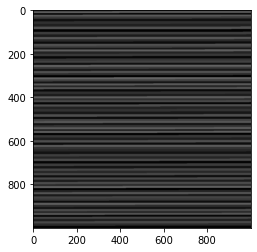

In [92]:
plt.imshow(p_img,cmap='gray',vmax=255,vmin=0)